In [79]:
#Importing Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

#Reading Dataset from CSV file, Stating first column as Index
iris_data = pd.read_csv('/Users/vaibhavnilkanthpattanshetti/Desktop/Vaibhav/DigiV/DataSet/iris.csv',index_col=0)
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [80]:
#Number of rows and columns in dataset and other deatils like max, min and average 
print(iris_data.shape)
print(iris_data.describe())

(150, 5)
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [81]:
# available data heads 
iris_data.columns


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [82]:
#Here, Our outcome variable will be 'Species'. Hence lets find number of All unique species in dataset
print (iris_data.Species.drop_duplicates())
print(iris_data.Species.value_counts())

1          setosa
51     versicolor
101     virginica
Name: Species, dtype: object
setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64


In [83]:
# Creating sub data set of all predictor variables
iris_sub_data=iris_data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
iris_sub_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [84]:
#Species wise analysis of max and min values
print(iris_data.groupby('Species').max())
print(iris_data.groupby('Species').min())
print(iris_data.groupby('Species').mean())


            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa               5.8          4.4           1.9          0.6
versicolor           7.0          3.4           5.1          1.8
virginica            7.9          3.8           6.9          2.5
            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa               4.3          2.3           1.0          0.1
versicolor           4.9          2.0           3.0          1.0
virginica            4.9          2.2           4.5          1.4
            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


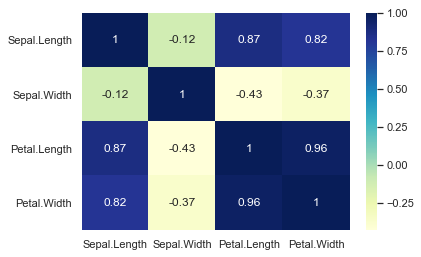

In [85]:
#Correlation Between 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'
sns.heatmap(iris_data.corr(),annot = True,cmap="YlGnBu")

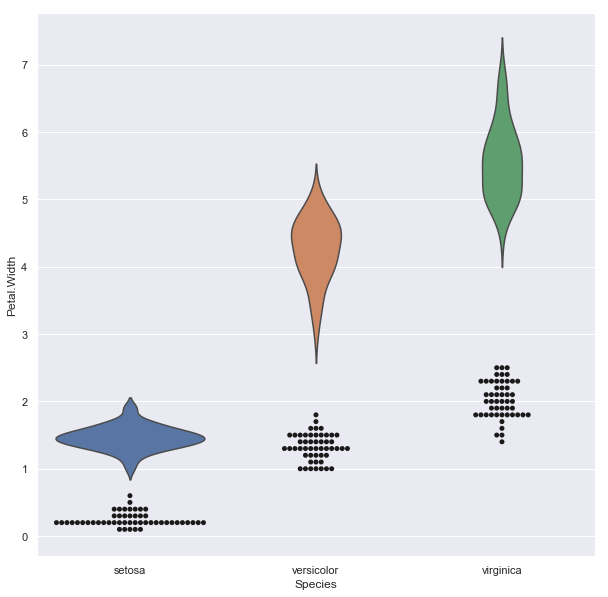

In [86]:
# comparison of all three Species wrt petal length on violoin plot and 
# petal width on swarm plot as it is having 0.96 correlation
plt.figure(figsize=(10, 10))
sns.violinplot(x='Species', y='Petal.Length', inner=None, data=iris_data)
sns.swarmplot(x='Species', y='Petal.Width',color='k', data=iris_data);

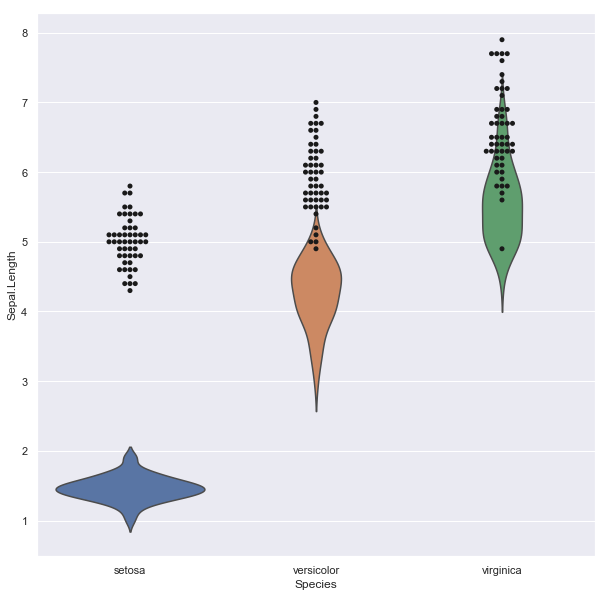

In [87]:
# Also comparison of all three Species wrt petal length on violoin plot and 
# sepal length on swarm plot as it is having 0.87 correlation
plt.figure(figsize=(10,10))
sns.violinplot(x='Species', y='Petal.Length', inner=None, data=iris_data)
sns.swarmplot(x='Species', y='Sepal.Length',color='k', data=iris_data);

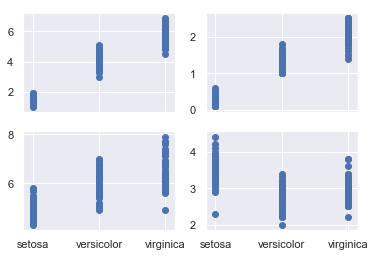

In [88]:
#Now lets try to build Multinomial logistic regression model for identification of species
#Here outcome variable is "Species" and Predictor Variables are Sepal Length, Sepal Width, Petal Length, Petal Width
# Firstly lets see the scatter plot of each Predictor with Outcome variable so as to understand the relation between them.
fig, axes = plt.subplots(2, 2,sharex='all')
sp=iris_data.Species
pl=iris_data['Petal.Length']
pw=iris_data['Petal.Width']
sl=iris_data['Sepal.Length']
sw=iris_data['Sepal.Width']
axes[0, 0].scatter(sp, pl)
axes[0, 1].scatter(sp, pw)
axes[1, 0].scatter(sp, sl)
axes[1, 1].scatter(sp, sw)

In [ ]:
# Now Splitting data into training and testing data
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_sub_data,iris_data[['Species']], test_size=0.3, random_state=0)

    # Train multi-classification model with logistic regression
    lr = linear_model.logistic_regression()
    lr.fit(X_train, y_train)
    
    # Train multinomial logistic regression model
    mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
    
    print "Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr.predict(X_train))
    print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr.predict(X_test))
    
    print "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train))
    print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test))

Given the figures of accuracy for both methods, These two models can be used to determine the sepcies of flower 
when petal and sepal length and width are known. Hence the flowers can be classified using these models 
